**Bắt đầu bằng việc phân loại với tập dữ liệu nhỏ, chỉ gồm 2 đặc trưng quan trọng nhất là weight và height, và cũng chỉ phân loại 2 lớp. 2 đặc trưng này dễ dàng giúp phân biệt các lớp, ko bị chồng chéo lên nhau, có tính tuyến tính hơn. Từ đó bài toán sẽ là Hard Margin vs Softmax**

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("D:/HUS_22001541/MachineLearning/Project/data/ObesityDataSet_raw_and_data_sinthetic.csv", header=0)
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [20]:
from sklearn.preprocessing import LabelEncoder

# gender calc caec mtrans

# one hot
data_encoded = pd.get_dummies(data, columns=['Gender', 'CALC', 'CAEC', 'MTRANS'], drop_first=True)

# label encoder
label_encoder = LabelEncoder()
cols_to_encode = ['FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'NObeyesdad']

for col in cols_to_encode:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# print(data_encoded.head())
data_encoded.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [21]:
data = data_encoded

In [22]:
data.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [23]:
filtered_df = data[data['NObeyesdad'].isin([0, 4])]

In [24]:
# Giữ lại chỉ các cột 'Weight', 'Height', và 'NObeyesdad'
filtered_data = filtered_df[['Weight', 'Height', 'NObeyesdad']]

In [25]:
X = filtered_data.drop('NObeyesdad', axis=1)
y = filtered_data['NObeyesdad']

In [26]:
y_binary = np.where(y == 0, -1, 1)
y = y_binary

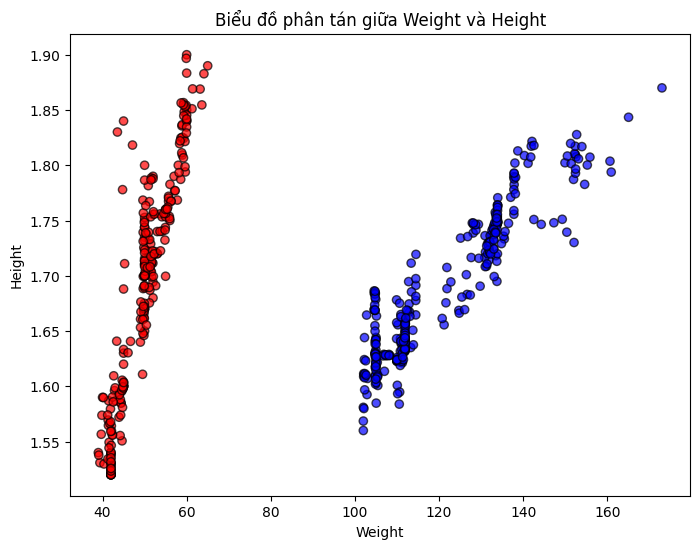

In [27]:
# Trực quan hóa dữ liệu

from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 6))

cmap = ListedColormap(['red', 'blue'])

plt.scatter(X['Weight'], X['Height'], c=y, cmap=cmap, edgecolor='k', alpha=0.7)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Biểu đồ phân tán giữa Weight và Height')

plt.show()


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Tiền xử lý dữ liệu (chuẩn hóa các giá trị)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra với tỷ lệ 7:3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Thực hiện với Softmax Regression

In [29]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_model.fit(X_train, y_train)

c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [30]:
accuracy = softmax_model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


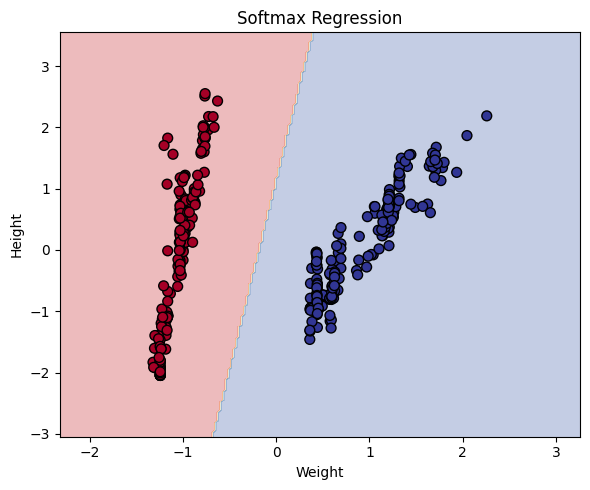

In [31]:
# Trực quan hóa Softmax

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1  # Thêm padding nhỏ
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1  # Thêm padding nhỏ

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), 
                     np.linspace(y_min, y_max, 200))
Z = softmax_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))  
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=50)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Softmax Regression')
plt.tight_layout()  
plt.show()


Thực hiện với Hard Margin SVM

In [32]:
from sklearn.svm import SVC

hardmargin_model = SVC(kernel='linear', C=1e10) 
hardmargin_model.fit(X_train, y_train)

accuracy = hardmargin_model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [33]:
from matplotlib.backends.backend_pdf import PdfPages
from cvxopt import matrix, solvers

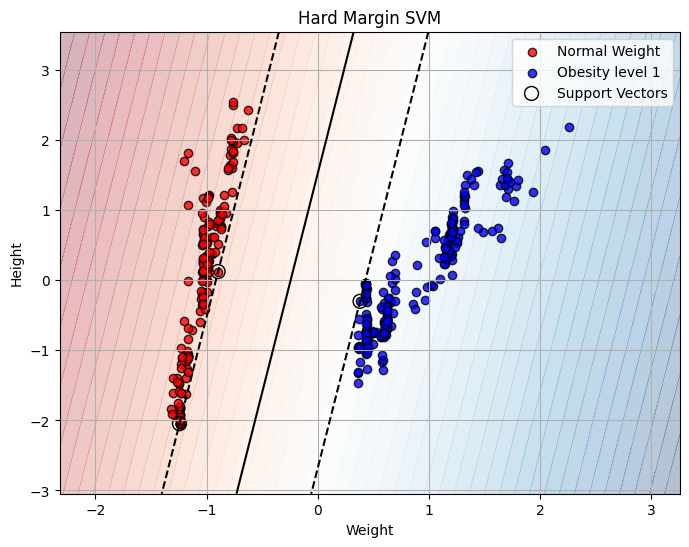

In [34]:
# Trực quan hóa Hard Margin SVM

w = hardmargin_model.coef_[0]  
b = hardmargin_model.intercept_[0] 
support_vectors = hardmargin_model.support_vectors_  

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = hardmargin_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k', linewidths=1.5)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='RdBu', alpha=0.3)  

labels_colors = {
    -1: ('red', 'Normal Weight'),
    1: ('blue', 'Obesity level 1')
}

for label in np.unique(y_train):
    idx = (y_train == label)
    color, class_label = labels_colors[label]
    plt.scatter(X_train[idx, 0], X_train[idx, 1], 
                color=color, label=class_label, edgecolors='k', alpha=0.8)

# Vẽ các điểm hỗ trợ
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Tùy chỉnh đồ họa
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Hard Margin SVM')
plt.legend()
plt.grid(True)
plt.show()

Với dữ liệu là hoàn toàn tách biệt tuyến tính, với số lượng đặc trưng nhỏ, thì cả 2 đều đã thực hiện tốt vai trò của mình, đều cho ra 1 hiệu suất tính toán tốt là 100%. Vậy nên dùng cái nào cũng được, tuy nhiên nếu dữ liệu có nhiều hơn thì nên dùng Softmax tại vì:

Đặc tính của dữ liệu:
- Với dữ liệu linearly separable (hoàn toàn tách biệt tuyến tính), Softmax chỉ cần học các trọng số cho từng đặc trưng để phân loại chính xác. Đây là một bài toán đơn giản và nhanh chóng đối với Softmax, vì không cần phải tối ưu hóa thêm yếu tố nào ngoài hàm chi phí đơn giản.
- SVM với hard margin lại cần phải tính toán biên phân chia tối ưu, tức là khoảng cách lớn nhất giữa các điểm dữ liệu từ các lớp. Quá trình tối ưu hóa này yêu cầu phải tìm được các "support vectors" và giải bài toán tối ưu bậc hai, vốn có thể phức tạp hơn và yêu cầu tính toán cao hơn trong trường hợp dữ liệu lớn.